In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

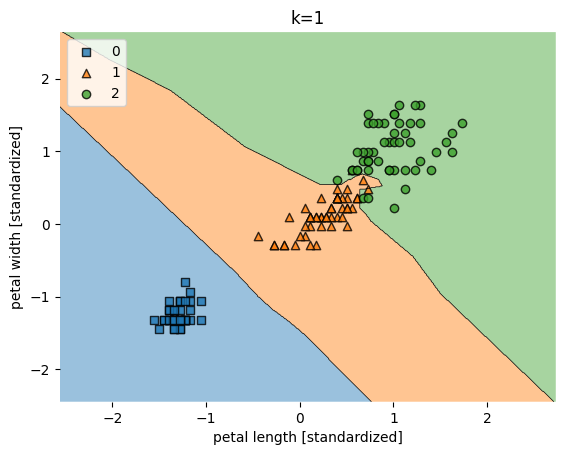

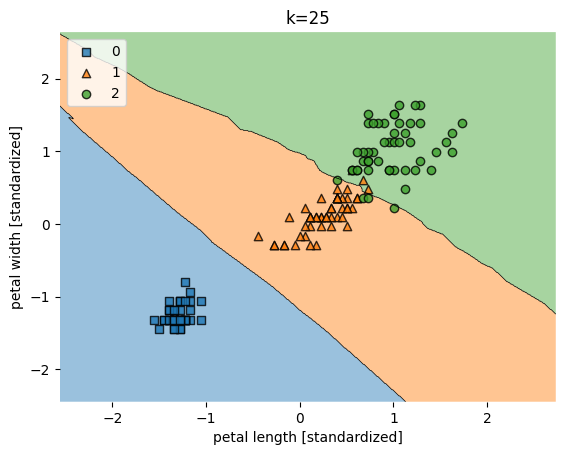

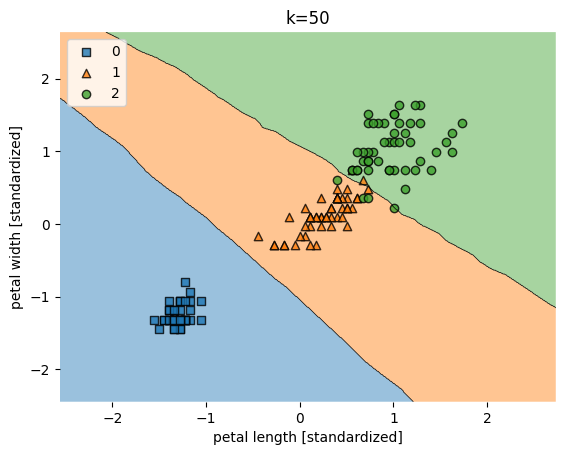

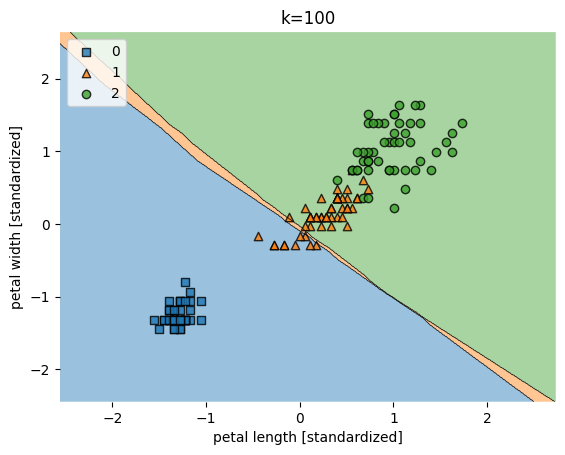

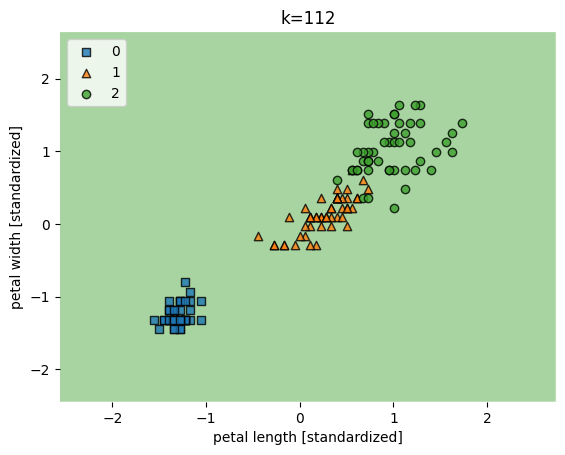

In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

for k in [1, 25, 50, 100, len(X_train)]:

    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
    knn.fit(X_train_std, y_train)

    plot_decision_regions(X=X_combined_std, y=y_combined, clf=knn)

    plt.xlabel("petal length [standardized]")
    plt.ylabel("petal width [standardized]")
    plt.title(f"k={k}")
    plt.legend(loc="upper left")
    plt.show()